In [1]:
pip install hydrobr

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import hydrobr

In [2]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import geopandas as gdp
from shapely.geometry import Point

<AxesSubplot:>

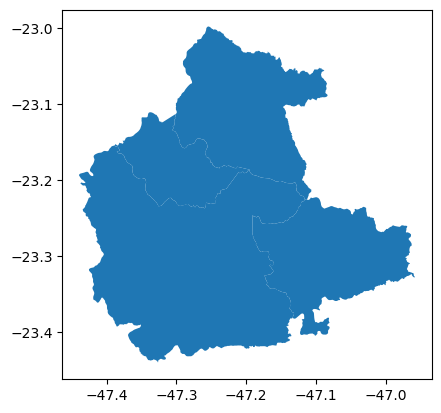

In [4]:
area = gdp.read_file(r'shapefile_pirai/area_consorcio_WSG84.shp')
area.plot()

In [5]:
hydrobr.get_data.ANA.list_prec_stations
hydrobr.get_data.ANA.list_flow_stations

<function hydrobr.get_data.ANA.list_flow_stations(state='', city='', source='ANAF')>

In [6]:
lista_flu = hydrobr.get_data.ANA.list_flow_stations()
lista_flu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3771 entries, 0 to 3770
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          3771 non-null   object 
 1   Code          3771 non-null   object 
 2   Type          3771 non-null   int64  
 3   DrainageArea  3707 non-null   float64
 4   SubBasin      3771 non-null   int64  
 5   City          3770 non-null   object 
 6   State         3771 non-null   object 
 7   Responsible   3771 non-null   object 
 8   Latitude      3771 non-null   float64
 9   Longitude     3771 non-null   float64
 10  StartDate     3771 non-null   object 
 11  EndDate       3771 non-null   object 
 12  NYD           3771 non-null   int64  
 13  MD            3771 non-null   float64
 14  N_YWOMD       3771 non-null   int64  
 15  YWMD          3771 non-null   float64
dtypes: float64(5), int64(4), object(7)
memory usage: 471.5+ KB


In [7]:
 
 pontos = [Point(x) for x in zip(lista_flu.Longitude,
                               lista_flu.Latitude)]
 
 crs = {'proj':'latlon','ellps':'WGS84','datum':'WGS84','no_def':True}

In [8]:
lista_flu_geo = gdp.GeoDataFrame(lista_flu, geometry=pontos,crs=crs)

<AxesSubplot:>

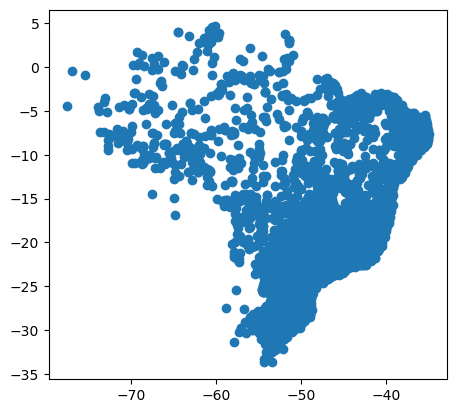

In [9]:
lista_flu_geo.plot()

In [10]:
indices = lista_flu_geo.geometry.within(area.geometry[0])

lista_selecionada = lista_flu_geo[indices]

lista_selecionada.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 0 entries
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          0 non-null      object  
 1   Code          0 non-null      object  
 2   Type          0 non-null      int64   
 3   DrainageArea  0 non-null      float64 
 4   SubBasin      0 non-null      int64   
 5   City          0 non-null      object  
 6   State         0 non-null      object  
 7   Responsible   0 non-null      object  
 8   Latitude      0 non-null      float64 
 9   Longitude     0 non-null      float64 
 10  StartDate     0 non-null      object  
 11  EndDate       0 non-null      object  
 12  NYD           0 non-null      int64   
 13  MD            0 non-null      float64 
 14  N_YWOMD       0 non-null      int64   
 15  YWMD          0 non-null      float64 
 16  geometry      0 non-null      geometry
dtypes: float64(5), geometry(1), int64(4), object(7)
memory usa

In [11]:
base = area.plot(color='white', edgecolor='black')
lista_selecionada.plot(ax=base,maker='o',color='red')

/home/soares/.local/lib/python3.10/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 640x480 with 1 Axes>